# American Sign Language Classification
The National Institute on Deafness and Other Communications Disorders (NIDCD) indicates that the 200-year-old American Sign Language is a complete, complex language (of which letter gestures are only part) but is the primary language for many deaf North Americans. Therefore, to build a system that can recognise sign language will help the deaf and hard-of-hearing better communicate using modern-day technologies. In this article, we will go through different architectures of CNN and see how it performs on classifying the Sign Language.

**About Dataset:**
The dataset can be accessed from Kaggle’s website. The training dataset contains 27455 images and 785 columns, while the test dataset contains 7172 images and 785 columns. The first column of the dataset contains the label of the image while the rest of the 784 columns represent a flattened 28,28 image.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_data = pd.read_csv('sign_mnist_train.csv')

In [ ]:
test_data = pd.read_csv('sign_mnist_test.csv')

In [ ]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


### Converting Dataframe into Array

In [ ]:
# Convert dataframe into array
training = train_data.iloc[:,:].values
test = test_data.iloc[:,:].values

In [ ]:
Y_train = training[:,0]
X_train = training[:,1:]
Y_test = test[:,0]
X_test = test[:, 1:]

In [ ]:
  print(Y_train)

[ 3  6  2 ... 18 17 23]


In [ ]:
print(Y_test)

[ 6  5 10 ...  2  4  2]


## Visualizing Digit Classes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of digit classes')

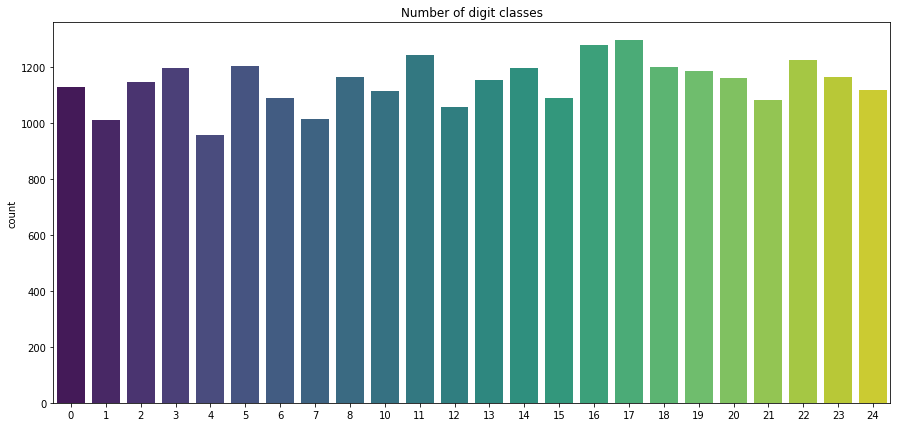

In [ ]:
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="viridis")
plt.title("Number of digit classes")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of digit classes')

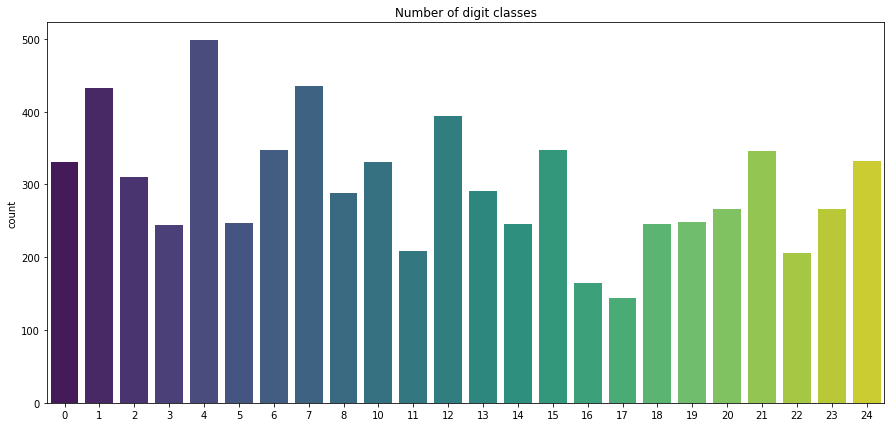

In [ ]:
plt.figure(figsize=(15,7))
g = sns.countplot(Y_test, palette="viridis")
plt.title("Number of digit classes")

## Reshaping the data 

In [ ]:
X_train = train_images.reshape(train_images.shape[0], *(28, 28, 1))
X_test = test_images.reshape(test_images.shape[0], *(28, 28, 1))

In [ ]:
print(X_train.shape)
print(X_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


14


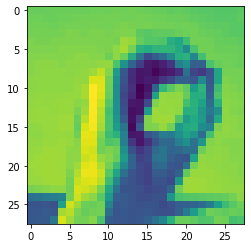

In [ ]:
import random
#Randomly check some image from the file
#Run this block multiple times to see different images
i = random.randint(1, 27456)
plt.imshow(training[i, 1:].reshape(28,28))
label = training[i, 0]
print(label)

## Creating Image Data Generator

In [ ]:
# Creating Image Data Generator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True
                                  )

test_datagen = ImageDataGenerator(rescale = 1./255)

## Convolutional Neural Network
For the convolutional front-end, we can start with a Three convolutional layer with a small filter size and a modest number of filters (64) followed by a max pooling layer. The filter maps can then be flattened to provide features to the classifier.

Given that the problem is a multi-class classification, we know that we will require an output layer with 10 nodes in order to predict the probability distribution of an image belonging to each of the 10 classes. This will also require the use of a softmax activation function. Between the feature extractor and the output layer, we can add a dense layer to interpret the features, in this case with 128 nodes.

All layers will use the ReLU activation function and the He weight initialization scheme, both best practices.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),           
    tf.keras.layers.MaxPooling2D(2,2),                          
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units = 256,activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units = 256,activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units = 128,activation = 'relu'),
    tf.keras.layers.Dropout(0.10),

    tf.keras.layers.Dense(26, activation='softmax'),
])



## Plotting the Neural Network 

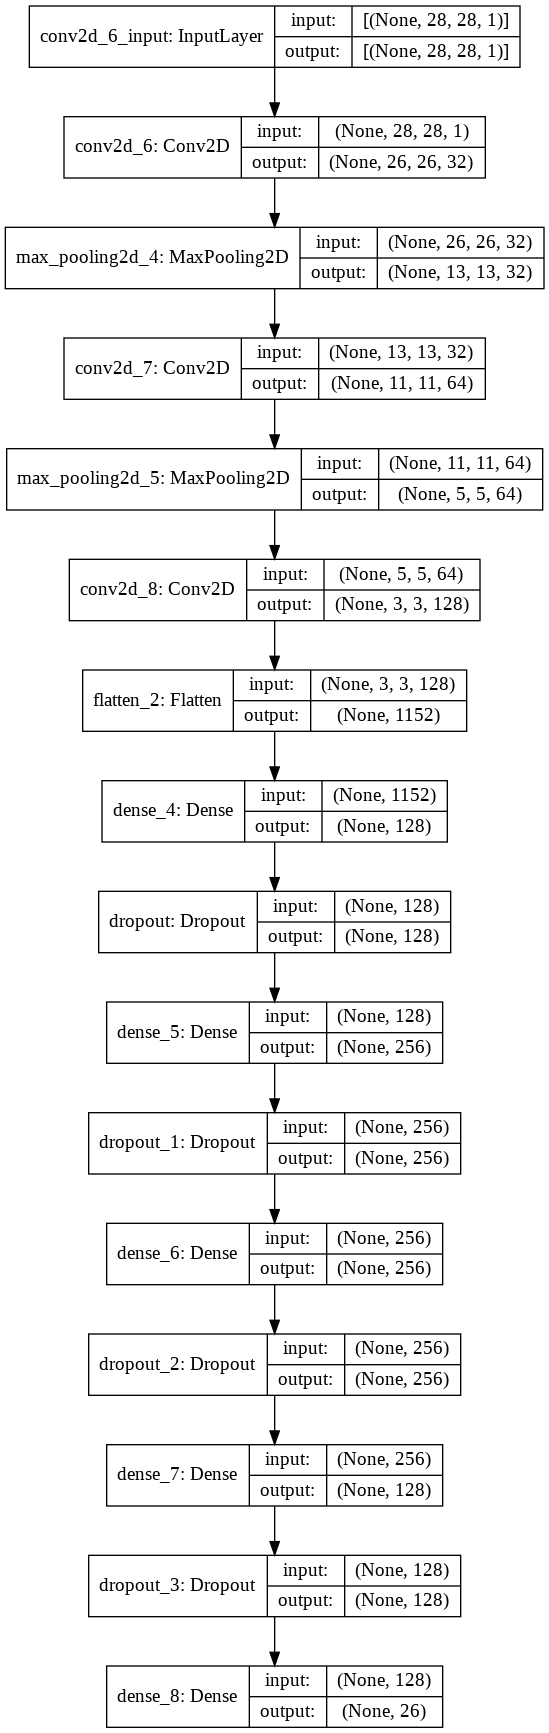

In [ ]:
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

## Compile the model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

train_gen = train_datagen.flow(train_images,
                               train_labels,
                              batch_size=64,
                              )

test_gen = test_datagen.flow(test_images,
                            test_labels,
                            batch_size=32,
                            )

## Train the Model

In [ ]:
#Train the model
history = model.fit(train_gen,
                   epochs=30,
                   validation_data=test_gen
                   )

Epoch 1/30
429/429 [==============================] - 10s 21ms/step - loss: 3.2079 - accuracy: 0.0455 - val_loss: 3.0053 - val_accuracy: 0.0666
Epoch 2/30
429/429 [==============================] - 9s 21ms/step - loss: 2.8155 - accuracy: 0.1030 - val_loss: 1.8990 - val_accuracy: 0.2971
Epoch 3/30
429/429 [==============================] - 9s 21ms/step - loss: 2.1039 - accuracy: 0.2689 - val_loss: 1.3111 - val_accuracy: 0.4752
Epoch 4/30
429/429 [==============================] - 9s 21ms/step - loss: 1.6312 - accuracy: 0.4052 - val_loss: 1.0157 - val_accuracy: 0.5637
Epoch 5/30
429/429 [==============================] - 9s 20ms/step - loss: 1.3174 - accuracy: 0.5127 - val_loss: 0.7571 - val_accuracy: 0.6813
Epoch 6/30
429/429 [==============================] - 9s 21ms/step - loss: 1.1547 - accuracy: 0.5816 - val_loss: 0.5719 - val_accuracy: 0.8054
Epoch 7/30
429/429 [==============================] - 9s 21ms/step - loss: 0.9982 - accuracy: 0.6458 - val_loss: 0.4591 - val_accuracy: 0.835

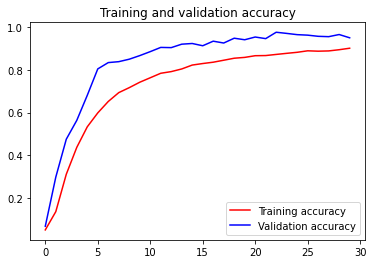

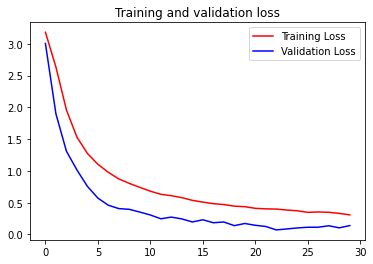

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.predict(np.expand_dims(X_test[0],axis = 0)).round(2)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis = 0)).round(2))

6

In [ ]:
y_pred = model.predict(X_test).round(2)
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

## Evaluating the Model

In [ ]:
model.evaluate(X_test,Y_test)

225/225 [==============================] - 1s 3ms/step - loss: 30.9893 - accuracy: 0.8921


[30.989286422729492, 0.8920803070068359]